In [ ]:
%pip install xarray

In [ ]:
%pip install netCDF4 h5netcdf

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
%pwd

In [2]:
file_path = "S-OSI_-FRA_-MTOP-GLBSST_FIELD-202311220000Z.nc"
data = xr.open_dataset(file_path)

In [3]:
print(data)

<xarray.Dataset>
Dimensions:                    (time: 1, lat: 3600, lon: 7200)
Coordinates:
  * time                       (time) datetime64[ns] 2023-11-22
  * lat                        (lat) float32 -89.97 -89.92 ... 89.92 89.97
  * lon                        (lon) float32 -180.0 -179.9 ... 179.9 180.0
Data variables: (12/14)
    sea_surface_temperature    (time, lat, lon) float32 ...
    sst_dtime                  (time, lat, lon) timedelta64[ns] ...
    sses_bias                  (time, lat, lon) float32 ...
    sses_standard_deviation    (time, lat, lon) float32 ...
    dt_analysis                (time, lat, lon) float32 ...
    wind_speed                 (time, lat, lon) float32 ...
    ...                         ...
    adi_dtime_from_sst         (time, lat, lon) float32 ...
    sources_of_adi             (time, lat, lon) float32 ...
    l2p_flags                  (time, lat, lon) int16 ...
    quality_level              (time, lat, lon) float32 ...
    satellite_zenith_angle 

In [4]:
# Access latitude and longitude values
latitude_values = data['lat'].values
longitude_values = data['lon'].values

# Print the values
print("Latitude values:", latitude_values)
print("Longitude values:", longitude_values)


Latitude values: [-89.97461  -89.924805 -89.875    ...  89.875     89.924805  89.97461 ]
Longitude values: [-179.97461 -179.9248  -179.875   ...  179.875    179.9248   179.97461]


1. **Spatial Visualization** Plot the sea surface temperature (sea_surface_temperature) on a map to visualize the spatial distribution.

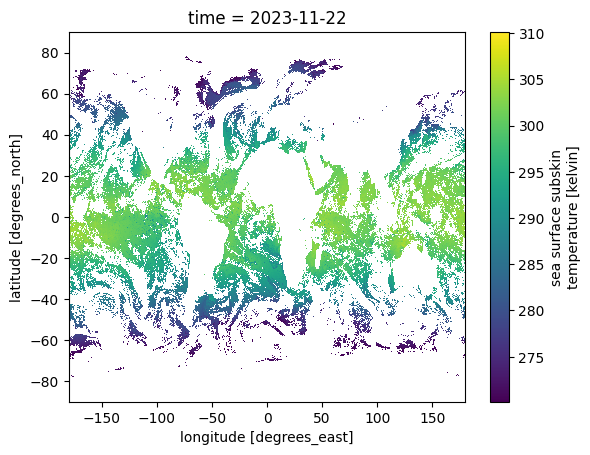

In [5]:
variable_name = "sea_surface_temperature"
variable_data = data[variable_name]
#Spatial Visualization
variable_data.plot()
plt.show()

2. **Time Series Analysis:** Since your data has a time dimension, you can analyze the temporal evolution of sea surface temperature.

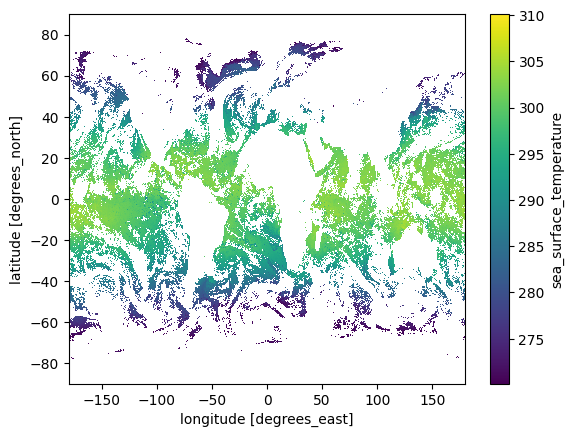

In [6]:
data['sea_surface_temperature'].mean(dim=['time']).plot()
plt.show()

In [7]:
# Access latitude and longitude values for sea_surface_temperature
sst_latitude_values = data['lat'].values
sst_longitude_values = data['lon'].values

In [8]:
# Print the values
print("Latitude values for sea_surface_temperature:", sst_latitude_values)
print("Longitude values for sea_surface_temperature:", sst_longitude_values)

Latitude values for sea_surface_temperature: [-89.97461  -89.924805 -89.875    ...  89.875     89.924805  89.97461 ]
Longitude values for sea_surface_temperature: [-179.97461 -179.9248  -179.875   ...  179.875    179.9248   179.97461]


In [9]:
# Extract sea_surface_temperature variable
sst_variable = data['sea_surface_temperature']

In [15]:
# Time series plot
sst_variable.mean(dim=['lat=5', 'lon=5']).plot()
plt.title('Time Series Plot of Sea Surface Temperature')
plt.xlabel('Time')
plt.ylabel('Sea Surface Temperature (units)')
plt.show()


ValueError: 'lat=5' not found in array dimensions ('time',)

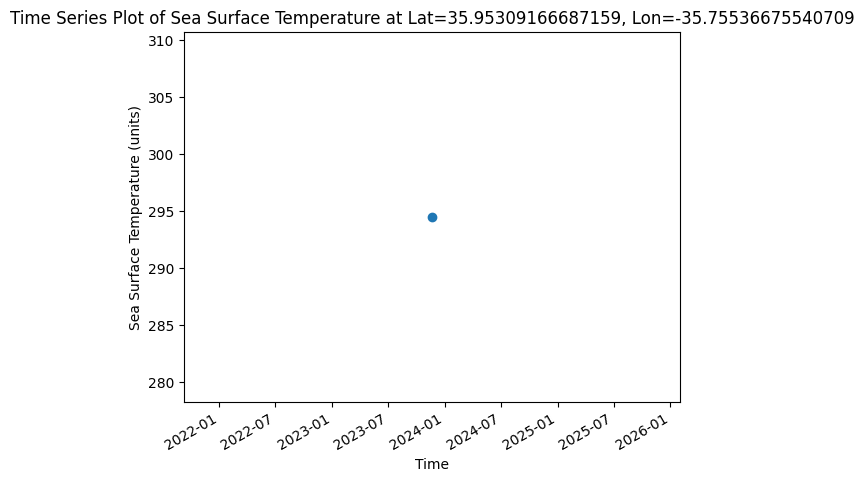

In [11]:
import matplotlib.pyplot as plt

# Choose specific latitude and longitude
selected_lat = 35.95309166687159  # Replace with your desired latitude
selected_lon = -35.75536675540709  # Replace with your desired longitude

# Extract data for the selected location
selected_location_data = data.sel(lat=selected_lat, lon=selected_lon, method='nearest')

# Extract sea_surface_temperature variable
sst_variable = selected_location_data['sea_surface_temperature']

# Plot the time series
sst_variable.plot.line(x='time', marker='o')
plt.title(f'Time Series Plot of Sea Surface Temperature at Lat={selected_lat}, Lon={selected_lon}')
plt.xlabel('Time')
plt.ylabel('Sea Surface Temperature (units)')
plt.show()


Statistical Summary:
Compute statistical metrics like mean, standard deviation, etc., for the sea surface temperature.

In [12]:
mean_sst = data['sea_surface_temperature'].mean()
std_dev_sst = data['sea_surface_temperature'].std()


In [13]:
import numpy as np

# Extract NumPy arrays from xarray DataArrays
sst_array = data['sea_surface_temperature'].values
wind_speed_array = data['wind_speed'].values

# Calculate correlation using NumPy
correlation = np.corrcoef(sst_array.flatten(), wind_speed_array.flatten())[0, 1]

print(f"Correlation between sea surface temperature and wind speed: {correlation}")


Correlation between sea surface temperature and wind speed: nan


Quality Assessment:
Analyze the quality level (quality_level) to assess the reliability of the data.

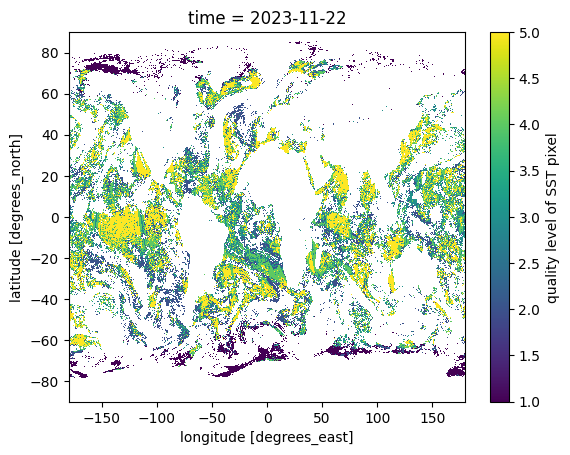

In [14]:
data['quality_level'].plot()
plt.show()


Spatial Subset:
Select a specific region of interest by subsetting based on latitude and longitude.

In [ ]:
subset_data = data.sel(lat=slice(-30, 30), lon=slice(-60, 60))

Anomaly Detection:
Identify anomalies in sea surface temperature by comparing with a baseline.``

In [ ]:
baseline = data['sea_surface_temperature'].mean(dim='time')
anomalies = data['sea_surface_temperature'] - baseline
anomalies

Machine Learning:
Depending on your goals, consider applying machine learning algorithms for tasks like prediction or clustering.

In [ ]:
from scipy.stats import pearsonr
import numpy as np

# Extract NumPy arrays from xarray DataArrays
sst_array = data['sea_surface_temperature'].values
sst_dtime_array = data['sst_dtime'].values.astype(float)

# Flatten arrays if necessary
sst_array_flat = sst_array.flatten()
sst_dtime_array_flat = sst_dtime_array.flatten()

# Check for NaN or inf values
nan_mask = np.isnan(sst_array_flat) | np.isnan(sst_dtime_array_flat) | np.isinf(sst_array_flat) | np.isinf(sst_dtime_array_flat)

# Remove NaN or inf values
sst_array_flat = sst_array_flat[~nan_mask]
sst_dtime_array_flat = sst_dtime_array_flat[~nan_mask]

# Calculate Pearson correlation using SciPy
correlation, _ = pearsonr(sst_array_flat, sst_dtime_array_flat)

print(f"Pearson correlation between sea surface temperature and sst_dtime: {correlation}")


In [ ]:
# Assuming your dataset is named 'data'
# Remove NaN values
data_cleaned = data.dropna(dim='time', how='any')

# Now you can proceed with your data analysis on the cleaned dataset
# For example, you can calculate the mean of 'sea_surface_temperature'
mean_wss = data_cleaned['wind_speed'].mean()

# Print the mean value
print("Mean wind_speed:", mean_wss)


In [ ]:
# Assuming your dataset is named 'data_cleaned'
unique_values = np.unique(data_cleaned['sea_surface_temperature'])
print("Unique values in sea_surface_temperature:", unique_values)
